In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We start off by loading and then merging the datasets we want to use:

In [2]:
dat1 = pd.read_csv('key.csv', sep=',')
dat2 = pd.read_csv('SP500_finratios.csv', sep=',', parse_dates=['adate', 'qdate', 'public_date'])
dat3 = pd.read_csv('ratings2.csv', sep=',', parse_dates=['datadate'])

In [3]:
#the columns of the first data set are renamed to match the names of the other data sets
dat1.columns = ['gvkey','linktype','permno','permco','linkdt','linkenddt','conm','tic','cusip']

In [4]:
#the duplicates in the key data set are removed, so that pd.merge() will work
#these duplicates come from differences in the variables linkdt and linkenddt, which we don't need
dat1 = dat1.set_index('permno')
dat1 = dat1[~dat1.index.duplicated(keep='first')]
dat1.reset_index(inplace=True)   #The permnos are converted back to a normal variable, otherwise an error can occur when merging on permno

In [5]:
#the variable datadate is renamed public_date and both are transformed to the same format, so
# that pd.merge()recognises them as one and the same
dat3['public_date'] = dat3['datadate']
del dat3['datadate']
dat2['public_date'] = pd.to_datetime(dat2.public_date)
dat3['public_date'] = pd.to_datetime(dat3.public_date)

In [6]:
dat1and2 = pd.merge(dat1, dat2, on='permno', how='inner', validate='one_to_many')

In [7]:
dat = pd.merge(dat1and2, dat3, on=['gvkey', 'public_date', 'conm', 'tic', 'cusip'], how='inner', validate='one_to_one')

In [8]:
dat

,permno,gvkey,linktype,permco,linkdt,linkenddt,conm,tic,cusip,adate,...,debt_capital,de_ratio,cash_ratio,quick_ratio,curr_ratio,at_turn,ptb,PEG_trailing,DIVYIELD,splticrm
0,21020,1045,LC,20010,19500101,19620130,AMERICAN AIRLINES GROUP INC,AAL,02376R102,2008-12-31,...,1.338,-9.366,0.428,0.603,0.664,0.816,NaN,NaN,NaN,B-
1,21020,1045,LC,20010,19500101,19620130,AMERICAN AIRLINES GROUP INC,AAL,02376R102,2009-12-31,...,1.376,-8.291,0.629,0.787,0.859,0.787,NaN,NaN,NaN,B-
2,21020,1045,LC,20010,19500101,19620130,AMERICAN AIRLINES GROUP INC,AAL,02376R102,2009-12-31,...,1.376,-8.291,0.629,0.787,0.859,0.787,NaN,NaN,NaN,B-
3,21020,1045,LC,20010,19500101,19620130,AMERICAN AIRLINES GROUP INC,AAL,02376R102,2009-12-31,...,1.376,-8.291,0.629,0.787,0.859,0.787,NaN,NaN,NaN,B-
4,21020,1045,LC,20010,19500101,19620130,AMERICAN AIRLINES GROUP INC,AAL,02376R102,2009-12-31,...,1.366,-8.617,0.551,0.712,0.780,0.799,NaN,NaN,NaN,B-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29853,13168,199356,LC,53964,20111221,E,TRIPADVISOR INC,TRIP,896945201,2014-12-31,...,0.286,0.741,1.478,1.961,1.961,0.726,9.038,9.364,NaN,NaN
29854,13168,199356,LC,53964,20111221,E,TRIPADVISOR INC,TRIP,896945201,2014-12-31,...,0.278,0.775,1.467,2.010,2.010,0.678,8.184,10.913,NaN,NaN
29855,13168,199356,LC,53964,20111221,E,TRIPADVISOR INC,TRIP,896945201,2014-12-31,...,0.278,0.775,1.467,2.010,2.010,0.678,9.392,12.469,NaN,NaN
29856,13168,199356,LC,53964,20111221,E,TRIPADVISOR INC,TRIP,896945201,2014-12-31,...,0.278,0.775,1.467,2.010,2.010,0.678,8.557,11.359,NaN,NaN


Now that we have the data, let's have a look at it. First of, we're interested in the distribution of the ratings:

In [9]:
dat.loc[:, 'splticrm'].value_counts()

BBB     4946
BBB+    4133
A-      3615
A       3196
BBB-    2654
A+      1670
BB+     1262
AA-      902
BB-      824
BB       757
AA       417
B+       305
AAA      296
AA+      199
B-       133
B        109
CCC+      50
D          4
CCC        2
Name: splticrm, dtype: int64

Seeing as there are only four observations of rating D, and only two observations of rating CCC, our data set does not allow us to draw any conclusions for these ratings and we have to drop them from our sample.

In [10]:
dat = dat[dat.loc[:, 'splticrm'] != 'CCC']
dat = dat[dat.loc[:, 'splticrm'] != 'D']

Following that, we consider our numerical data:

In [11]:
des = dat.loc[:, 'bm':'cash_lt'].describe()
ind = [3, 1, 5, 7]   #printing the entire .describe() information consumes unnecessarily much computation power, so I index the lines I'm interested in
print(des.iloc[ind], '\n')
des = dat.loc[:, 'invt_act':].describe()  #I do this in two steps, because I don't want any variables hidden behind "..."
ind = [3, 1, 5, 7]
print(des.iloc[ind])

              bm          ps         pcf        dpr        npm        gpm  \
min     0.001000    0.047000 -224.460000  -0.001000 -51.493000 -37.707000   
mean    0.511099    2.530784   12.210846   0.489392   0.080365   0.431986   
50%     0.391000    1.814000   11.113000   0.305000   0.092000   0.406000   
max   137.237000  145.774000  280.893000  80.554000   1.799000   0.982000   

            cfm       roa        roe      roce     efftax     GProf  \
min  -47.694000 -0.595000 -34.647000 -1.111000 -12.365000 -1.143000   
mean   0.152864  0.142624   0.166138  0.176364   0.290338  0.294441   
50%    0.152500  0.139000   0.137000  0.154000   0.302000  0.263500   
max    2.054000  0.626000  15.502000  2.279000  29.944000  1.255000   

      equity_invcap  debt_invcap  totdebt_invcap  capital_ratio     int_debt  \
min      -17.816000     0.000000        0.000000      -5.619000     0.000000   
mean       0.593529     0.389615        0.471293       0.395291     0.336795   
50%        0.63300

The output suggests that several variables have extreme outliers - for instance bm has a minimum of 0.001000, a mean of  0.506463, but a maximum of 137.237000. Visualising the data with boxplots shows this quite notably. This means the imputation method we initially considered, which was based on linear regression, is probably not the best way to handle the missing values.

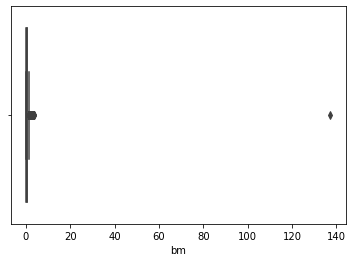

In [12]:
# the outliers we show in these boxplots are so extreme that when we tried using linear regression for
# the imputation, they influenced the slope so much that some negative values where imputed ...
sns.boxplot(x = 'bm', data = dat)

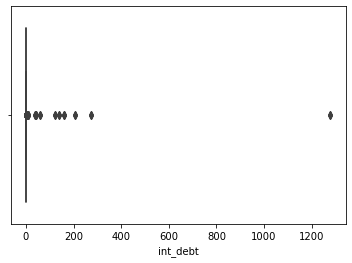

In [13]:
sns.boxplot(x = 'int_debt', data = dat)

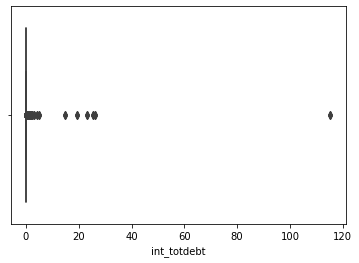

In [14]:
sns.boxplot(x = 'int_totdebt', data = dat)

We also noticed that DIVYIELD was not included in the summary above. Apparently, it is encoded as a string, which we fix.

In [15]:
dat.loc[:, 'DIVYIELD'] = dat.loc[:, 'DIVYIELD'].str.replace('%', '')
dat.loc[:, 'DIVYIELD'] = dat.loc[:, 'DIVYIELD'].astype(float)

In [16]:
dat.loc[:, 'DIVYIELD'].describe()

count    23116.000000
mean         2.295734
std          1.333045
min          0.030000
25%          1.320000
50%          2.150000
75%          3.060000
max         16.000000
Name: DIVYIELD, dtype: float64

After looking at the data we have, we take a look at the data we do not have:

In [17]:
#just a little indulgence
class color:
   bold = '\033[1m'
   end = '\033[0m'

In [18]:
col_Names = dat.columns.values
total_NAs = pd.isna(dat).sum()
percentage_NAs = dat.isna().sum()/len(dat)
print(color.bold + "%-20s %-14s %s" %("Column Names", "Total NAs", "NAs per observations") + color.end )
#I used the % operator because tab didn't work and this allows me to define the spaces between the items

#the loop prints one line after another
for item_a, item_b, item_c in zip(col_Names, total_NAs, percentage_NAs):
    print("%-20s %-14d %.6f" %(item_a, item_b, item_c))

Column Names         Total NAs      NAs per observations
permno               0              0.000000
gvkey                0              0.000000
linktype             0              0.000000
permco               0              0.000000
linkdt               0              0.000000
linkenddt            0              0.000000
conm                 0              0.000000
tic                  0              0.000000
cusip                0              0.000000
adate                13             0.000435
qdate                0              0.000000
public_date          0              0.000000
bm                   638            0.021372
ps                   12             0.000402
pcf                  27             0.000904
dpr                  1862           0.062374
npm                  12             0.000402
gpm                  12             0.000402
cfm                  98             0.003283
roa                  27             0.000904
roe                  666            0.02231

As shown here, 4384 observations have no long term credit rating (splticrm), which means we cannot use those observations for our prediction models. Still, the observations might be helpful for imputing missing values, so we will drop them later.

Another variable that stands out is PEG_trailing, and we are unsure how valid it is to impute more than one third of the data. However, dropping the missing values in PEG_trailing is not an option, since they are not missing completely at random: We can show that the missingness is systematic by plotting it against another variable. So, if we were to just drop the missing values, we would bias the remaining data. Instead, we could drop the entire variable, but we might as well keep it in for now, impute the missing values, and if we later find that it reduces the predictive power, we can still drop it. (Spoiler: It does not)

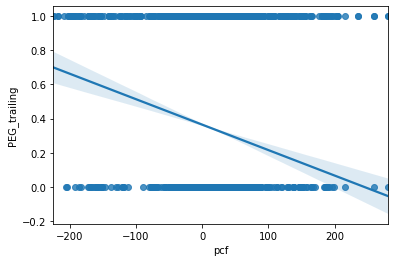

In [19]:
sns.regplot(dat.pcf, dat.PEG_trailing.isna())

So now, we fill in the missing data by using IterativeImputer. Its method is to model each feature with missing values as a function of other features in a round-robin regression. As stated above, linear regression is not an ideal function here, so we decided to use scikit-learn's ExtraTreesRegressor, because it works better with extreme outliers and non-linear relationships.

In [20]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
import random

In [21]:
numerical_dat = dat.loc[:, 'bm':'DIVYIELD']

In [22]:
# defining the imputation method
random.seed(42)
imp = IterativeImputer(estimator = ExtraTreesRegressor(n_estimators=10, n_jobs=-1))

In [23]:
# actually imputing the values
imputed = imp.fit_transform(numerical_dat)

c:\program files\python37\lib\site-packages\sklearn\impute\_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [24]:
# the imputation returns an array, so we transform the data back to a dataframe
imputed = pd.DataFrame(data = imputed, columns = numerical_dat.columns.values)

Now that the missing data is imputed, we add public_date, gvkey and splticrm to the data frame. The first two will be needed later for further analysis, the latter is added so we can drop all observations with missing credit rating.

In [25]:
imputed = pd.concat([imputed, dat.loc[:, 'public_date'], dat.loc[:, 'gvkey'], dat.loc[:, 'splticrm']], axis = 'columns')
imputed = imputed.dropna(axis = 'rows', how = 'any')

In [26]:
imputed

,bm,ps,pcf,dpr,npm,gpm,cfm,roa,roe,roce,...,cash_ratio,quick_ratio,curr_ratio,at_turn,ptb,PEG_trailing,DIVYIELD,public_date,gvkey,splticrm
0,13.9530,0.113,-5.253,7.8827,-0.072,0.163,-0.018,0.024,-1.5750,-0.058,...,0.428,0.603,0.664,0.816,3.9478,-1.8957,4.156,2010-01-31,1045.0,B-
1,0.3680,0.153,3.287,5.4696,-0.074,0.150,-0.018,0.010,-1.0756,-0.092,...,0.629,0.787,0.859,0.787,5.6441,-1.7340,1.243,2010-02-28,1045.0,B-
2,0.3680,0.152,3.258,5.4696,-0.074,0.150,-0.018,0.010,-1.0756,-0.092,...,0.629,0.787,0.859,0.787,5.6441,-1.7340,1.243,2010-03-31,1045.0,B-
3,0.3755,0.123,2.640,5.4696,-0.074,0.150,-0.018,0.010,-1.0756,-0.092,...,0.629,0.787,0.859,0.787,5.6604,-1.7340,1.245,2010-04-30,1045.0,B-
4,0.3751,0.127,2.753,7.4958,-0.079,0.150,-0.025,0.009,-1.0756,-0.110,...,0.551,0.712,0.780,0.799,5.4029,-2.0372,2.063,2010-05-31,1045.0,B-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29832,0.0780,11.083,28.586,0.0000,0.243,0.982,0.279,0.258,0.2820,0.268,...,1.982,2.851,2.851,0.650,11.9060,3.3840,1.327,2016-09-30,189491.0,BBB
29833,0.0740,13.734,37.120,0.0000,0.217,0.981,0.256,0.239,0.2540,0.250,...,1.986,2.595,2.595,0.682,14.7840,7.0538,1.233,2016-10-31,189491.0,BBB
29834,0.0740,12.452,33.655,0.0000,0.217,0.981,0.256,0.239,0.2540,0.250,...,1.986,2.595,2.595,0.682,13.4040,8.0100,1.233,2016-11-30,189491.0,BBB
29835,0.0740,11.099,29.996,0.0000,0.217,0.981,0.256,0.239,0.2540,0.250,...,1.986,2.595,2.595,0.682,11.9470,4.8961,1.233,2016-12-31,189491.0,BBB


Finally, the time has come to train our prediction model. We assume that including all variables will lead to overfitting, and using just a subset of all variables should improve the result. We test that assumption by trying out both.

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [28]:
X = imputed.loc[:, :'DIVYIELD']   # using all variables at our disposal
y = pd.factorize(imputed.loc[:, 'splticrm'])[0]

In [29]:
# Train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [30]:
# Create Pipeline object with standard scaler and RandomForest estimator
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('classifier', RandomForestClassifier())])

# Define the hyperparameter values to be tested
param_grid = [{'scaler': [StandardScaler()],
               'classifier': [RandomForestClassifier(criterion='gini')],
               'classifier__max_depth': [1, 10, 100, None],
               'classifier__min_samples_split': [2, 10, 20]}]

# Run brute-force grid search
gs = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
gs = gs.fit(X_train, y_train)

print('Best CV accuracy: {:.2f}'.format(gs.best_score_))
print('Test score:       {:.2f}'.format(gs.score(X_test, y_test)))
print('Best parameters: {}'.format(gs.best_params_))

Best CV accuracy: 0.96
Test score:       0.97
Best parameters: {'classifier': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), 'classifier__max_depth': 100, 'classifier__min_samples_split': 2, 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}


In [31]:
subset = ['roe', 'curr_ratio', 'bm', 'de_ratio', 'dpr', 'at_turn', 'debt_ebitda']   # using just a subset, for reasoning see abstract
X = imputed.loc[:, subset]

In [32]:
# Train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [33]:
# Create Pipeline object with standard scaler and RandomForest estimator
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('classifier', RandomForestClassifier())])

# Define the hyperparameter values to be tested
param_grid = [{'scaler': [StandardScaler()],
               'classifier': [RandomForestClassifier(criterion='gini')],
               'classifier__max_depth': [1, 10, 100, None],
               'classifier__min_samples_split': [2, 10, 20]}]

# Run brute-force grid search
gs = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
gs = gs.fit(X_train, y_train)

print('Best CV accuracy: {:.2f}'.format(gs.best_score_))
print('Test score:       {:.2f}'.format(gs.score(X_test, y_test)))
print('Best parameters: {}'.format(gs.best_params_))

Best CV accuracy: 0.95
Test score:       0.96
Best parameters: {'classifier': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), 'classifier__max_depth': 100, 'classifier__min_samples_split': 2, 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}


When comparing both models, it turns out that using all variables is actually more helpful than using just a subset of variables. Apparently, random forest is not very susceptible to overfitting. Now we come back to the variable PEG_trailing, of which we weren't sure whether to include it, because it had so many missing values. We try out if we can improve the 'full set' model by just excluding this one variable.

In [34]:
X = imputed.loc[:, :'ptb']
X = pd.concat([X, imputed.loc[:, 'DIVYIELD']], axis = 'columns')

In [35]:
# Train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [36]:
# Create Pipeline object with standard scaler and RandomForest estimator
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('classifier', RandomForestClassifier())])

# Define the hyperparameter values to be tested
param_grid = [{'scaler': [StandardScaler()],
               'classifier': [RandomForestClassifier(criterion='gini')],
               'classifier__max_depth': [1, 10, 100, None],
               'classifier__min_samples_split': [2, 10, 20]}]

# Run brute-force grid search
gs = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
gs = gs.fit(X_train, y_train)

print('Best CV accuracy: {:.2f}'.format(gs.best_score_))
print('Test score:       {:.2f}'.format(gs.score(X_test, y_test)))
print('Best parameters: {}'.format(gs.best_params_))

Best CV accuracy: 0.96
Test score:       0.97
Best parameters: {'classifier': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), 'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}


As we see, the prediction score does not change when we exclude PEG_trailing, so we might as well leave it in.

Next, we try using a support vector classifier (SVC) instead of random forest.

In [37]:
X = imputed.loc[:, :'DIVYIELD']   # using all variables at our disposal

In [38]:
# Train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [39]:
# Create Pipeline object with standard scaler and SVC estimator
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('classifier', SVC())])

# Define the hyperparameter values to be tested
param_grid = [{'scaler': [StandardScaler()],
               'classifier': [SVC(kernel='rbf')],
               'classifier__gamma': [1, 10],
               'classifier__C': [10, 100]}]

# Run brute-force grid search
gs = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
gs = gs.fit(X_train, y_train)

print('Best CV accuracy: {:.2f}'.format(gs.best_score_))
print('Test score:       {:.2f}'.format(gs.score(X_test, y_test)))
print('Best parameters: {}'.format(gs.best_params_))

Best CV accuracy: 0.93
Test score:       0.95
Best parameters: {'classifier': SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False), 'classifier__C': 100, 'classifier__gamma': 1, 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}


In [40]:
subset = ['roe', 'curr_ratio', 'bm', 'de_ratio', 'dpr', 'at_turn', 'debt_ebitda']   # using just a subset
X = imputed.loc[:, subset]

In [41]:
# Train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [42]:
# Create Pipeline object with standard scaler and SVC estimator
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('classifier', SVC())])

# Define the hyperparameter values to be tested
param_grid = [{'scaler': [StandardScaler()],
               'classifier': [SVC(kernel='rbf')],
               'classifier__gamma': [1, 10],
               'classifier__C': [10, 100]}]

# Run brute-force grid search
gs = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
gs = gs.fit(X_train, y_train)

print('Best CV accuracy: {:.2f}'.format(gs.best_score_))
print('Test score:       {:.2f}'.format(gs.score(X_test, y_test)))
print('Best parameters: {}'.format(gs.best_params_))

Best CV accuracy: 0.91
Test score:       0.93
Best parameters: {'classifier': SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), 'classifier__C': 100, 'classifier__gamma': 10, 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}


We additionally tried out using the kernel functions 'poly' and 'sigmoid', but calculating them took extremely long, so we do not include them here. The only information we gained from them is that the radial bias function is the best kernel function for our purposes.

We find that for both the entire dataset and the subset, random forest works better than SVC. So, from now on, we will only use random forest and the entire set of variables.

Now, we are interested in how earlier data compares to more recent data in their predictive power. To do this, we split the dataset in two halves, one half containing all observations until the end of June 2013, the other half containing all later observations.

In [43]:
firsthalf = imputed.set_index('public_date')
firsthalf.sort_index()
firsthalf = firsthalf.loc['20100131':'20130701']

In [44]:
firsthalf   # checking if splitting the data worked as intended

,bm,ps,pcf,dpr,npm,gpm,cfm,roa,roe,roce,...,de_ratio,cash_ratio,quick_ratio,curr_ratio,at_turn,ptb,PEG_trailing,DIVYIELD,gvkey,splticrm
public_date,,,,,,,,,,,,,,,,,,,,,
2010-01-31,13.9530,0.113,-5.253,7.8827,-0.072,0.163,-0.018,0.024,-1.5750,-0.058,...,-9.366,0.428,0.603,0.664,0.816,3.9478,-1.8957,4.156,1045.0,B-
2010-02-28,0.3680,0.153,3.287,5.4696,-0.074,0.150,-0.018,0.010,-1.0756,-0.092,...,-8.291,0.629,0.787,0.859,0.787,5.6441,-1.7340,1.243,1045.0,B-
2010-03-31,0.3680,0.152,3.258,5.4696,-0.074,0.150,-0.018,0.010,-1.0756,-0.092,...,-8.291,0.629,0.787,0.859,0.787,5.6441,-1.7340,1.243,1045.0,B-
2010-04-30,0.3755,0.123,2.640,5.4696,-0.074,0.150,-0.018,0.010,-1.0756,-0.092,...,-8.291,0.629,0.787,0.859,0.787,5.6604,-1.7340,1.245,1045.0,B-
2010-05-31,0.3751,0.127,2.753,7.4958,-0.079,0.150,-0.025,0.009,-1.0756,-0.110,...,-8.617,0.551,0.712,0.780,0.799,5.4029,-2.0372,2.063,1045.0,B-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-02-28,0.4470,1.228,13.788,0.3410,0.062,0.427,0.102,0.123,0.1050,0.132,...,1.248,0.550,1.787,2.396,0.810,2.0580,3.5557,1.880,189491.0,BBB
2013-03-31,0.4470,1.384,15.541,0.3410,0.062,0.427,0.102,0.123,0.1050,0.132,...,1.248,0.550,1.787,2.396,0.810,2.3200,3.6954,1.670,189491.0,BBB
2013-04-30,0.4470,1.702,19.114,0.3410,0.062,0.427,0.102,0.123,0.1050,0.132,...,1.248,0.550,1.787,2.396,0.810,2.8530,4.0986,1.350,189491.0,BBB


In [45]:
X = firsthalf.loc[:, :'DIVYIELD']
y = firsthalf.loc[:, 'splticrm']

In [46]:
# Train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [47]:
# Create Pipeline object with standard scaler and RandomForest estimator
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('classifier', RandomForestClassifier())])

# Define the hyperparameter values to be tested
param_grid = [{'scaler': [StandardScaler()],
               'classifier': [RandomForestClassifier(criterion='gini')],
               'classifier__max_depth': [1, 10, 100, None],
               'classifier__min_samples_split': [2, 10, 20]}]

# Run brute-force grid search
gs = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
gs = gs.fit(X_train, y_train)

print('Best CV accuracy: {:.2f}'.format(gs.best_score_))
print('Test score:       {:.2f}'.format(gs.score(X_test, y_test)))
print('Best parameters: {}'.format(gs.best_params_))

Best CV accuracy: 0.97
Test score:       0.98
Best parameters: {'classifier': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), 'classifier__max_depth': 100, 'classifier__min_samples_split': 2, 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}


In [48]:
secondhalf = imputed.set_index('public_date')
secondhalf.sort_index()
secondhalf = secondhalf.loc['20130701':'20170201']

In [49]:
X = secondhalf.loc[:, :'DIVYIELD']
y = secondhalf.loc[:, 'splticrm']

In [50]:
# Train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [51]:
# Create Pipeline object with standard scaler and RandomForest estimator
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('classifier', RandomForestClassifier())])

# Define the hyperparameter values to be tested
param_grid = [{'scaler': [StandardScaler()],
               'classifier': [RandomForestClassifier(criterion='gini')],
               'classifier__max_depth': [1, 10, 100, None],
               'classifier__min_samples_split': [2, 10, 20]}]

# Run brute-force grid search
gs = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
gs = gs.fit(X_train, y_train)

print('Best CV accuracy: {:.2f}'.format(gs.best_score_))
print('Test score:       {:.2f}'.format(gs.score(X_test, y_test)))
print('Best parameters: {}'.format(gs.best_params_))

Best CV accuracy: 0.96
Test score:       0.97
Best parameters: {'classifier': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), 'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}


To our surprise, it seems like the more recent data is slightly worse at predicting the long term credit ratings. (Yes, the difference is small, but we tried many different random.seeds and the difference is consistent.) We wonder if this means that using lagged data would improve our prediction of the ratings. We try this out, and we start by lagging all data by one month, then half a year, then one year, and finally three and a half years (which is basically the same as using the independent variables in firsthalf to predict the dependent variable in secondhalf).

In [52]:
lagged = imputed.set_index(['public_date', 'gvkey']) # we need these indeces to instruct unstack().shift()

In [53]:
one_month_lag = lagged.loc[:, :'DIVYIELD'].unstack().shift(1)
# lagged.loc[:, :'DIVYIELD'] because we want to shift everything BUT splticrm
# unstack() makes sure that the data is shifted within its group only, defined by gvkey
# the 1 in shift() is for 1 month (in our case)
one_month_lag = one_month_lag.stack(dropna=False) # stack back together
one_month_lag = pd.concat([one_month_lag, lagged.loc[:, 'splticrm']], axis = 'columns') # adding splticrm again

In [54]:
# after we added splticrm we need to get rid of the first month, for which shift() created NAs
one_month_lag = one_month_lag.dropna(axis = 'rows', how = 'any')

In [55]:
one_month_lag   # checking that everything worked as intended

bm      ps     pcf     dpr    npm    gpm    cfm  \
public_date gvkey                                                           
2010-02-28  1045.0    13.953   0.113  -5.253  7.8827 -0.072  0.163 -0.018   
            1075.0     1.252   1.197   3.547  0.7720  0.084  0.330  0.251   
            1078.0     0.257   2.313   9.064  0.4680  0.167  0.648  0.236   
            1161.0     0.128   0.995   6.506  0.0220  0.180  0.571  0.330   
            1209.0     0.363   1.720  10.387  0.4390  0.101  0.381  0.206   
...                      ...     ...     ...     ...    ...    ...    ...   
2017-01-31  184700.0   0.905   0.179   3.227  7.5210  0.029  0.178  0.055   
            186310.0   1.193   0.191   3.814  0.0260  0.038  0.085  0.050   
            186989.0   0.402   2.031  22.723  0.1930  0.047  0.362  0.074   
            188255.0   0.409   1.224  12.075  0.1440  0.069  0.420  0.101   
            189491.0   0.074  11.099  29.996  0.0000  0.217  0.981  0.256   

                        roa    roe   roce  ...  debt_capital  de_ratio  \
public_date gvkey                          ...                           
2010-02-28  1045.0    0.024 -1.575 -0.058  ...         1.338    -9.366   
            1075.0    0.090  0.056  0.089  ...         0.562     2.596   
            1078.0    0.193  0.259  0.199  ...         0.455     1.390   
            1161.0    0.088 -0.671 -0.031  ...         0.981    68.517   
            1209.0    0.175  0.161  0.143  ...         0.525     1.536   
...                     ...    ...    ...  ...           ...       ...   
2017-01-31  184700.0  0.094  0.127  0.123  ...         0.561     3.043   
            186310.0  0.212  0.266  0.337  ...         0.532     1.650   
            186989.0  0.094  0.065  0.104  ...         0.213     0.600   
            188255.0  0.147  0.113  0.162  ...         0.361     0.980   
            189491.0  0.239  0.254  0.250  ...         0.321     0.704   

                      cash_ratio  quick_ratio  curr_ratio  at_turn      ptb  \
public_date gvkey                                                             
2010-02-28  1045.0         0.428        0.603       0.664    0.816   3.9478   
            1075.0         0.091        0.654       0.843    0.268   0.7940   
            1078.0         0.553        1.296       1.554    0.625   3.5190   
            1161.0         1.212        1.645       1.916    0.731   7.2410   
            1209.0         0.127        0.984       1.272    0.664   2.5700   
...                          ...          ...         ...      ...      ...   
2017-01-31  184700.0       0.134        0.901       1.133    1.177   0.7790   
            186310.0       0.296        0.872       1.257    2.973   1.1830   
            186989.0       0.340        1.270       1.907    0.929   2.6960   
            188255.0       0.328        1.518       2.104    0.903   2.2320   
            189491.0       1.986        2.595       2.595    0.682  11.9470   

                      PEG_trailing  DIVYIELD  splticrm  
public_date gvkey                                       
2010-02-28  1045.0         -1.8957     4.156        B-  
            1075.0          5.2467     5.980      BBB-  
            1078.0          0.2280     3.700        AA  
            1161.0          0.5450     3.421        B-  
            1209.0          2.5090     2.840         A  
...                            ...       ...       ...  
2017-01-31  184700.0        1.9221     2.876       BB+  
            186310.0        2.7411     2.620       BB+  
            186989.0        9.0084     0.890       BBB  
            188255.0        1.6537     1.600      BBB+  
            189491.0        4.8961     1.233       BBB  

[25133 rows x 40 columns]

In [56]:
X = one_month_lag.loc[:, :'DIVYIELD']
y = one_month_lag.loc[:, 'splticrm']

In [57]:
# Train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [58]:
# Create Pipeline object with standard scaler and RandomForest estimator
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('classifier', RandomForestClassifier())])

# Define the hyperparameter values to be tested
param_grid = [{'scaler': [StandardScaler()],
               'classifier': [RandomForestClassifier(criterion='gini')],
               'classifier__max_depth': [1, 10, 100, None],
               'classifier__min_samples_split': [2, 10, 20]}]

# Run brute-force grid search
gs = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
gs = gs.fit(X_train, y_train)

print('Best CV accuracy: {:.2f}'.format(gs.best_score_))
print('Test score:       {:.2f}'.format(gs.score(X_test, y_test)))
print('Best parameters: {}'.format(gs.best_params_))

Best CV accuracy: 0.96
Test score:       0.96
Best parameters: {'classifier': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), 'classifier__max_depth': 100, 'classifier__min_samples_split': 2, 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}


In [59]:
half_year_lag = lagged.loc[:, :'DIVYIELD'].unstack().shift(6)
half_year_lag = half_year_lag.stack(dropna=False)
half_year_lag = pd.concat([half_year_lag, lagged.loc[:, 'splticrm']], axis = 'columns')

In [60]:
half_year_lag = half_year_lag.dropna(axis = 'rows', how = 'any')

In [61]:
X = half_year_lag.loc[:, :'DIVYIELD']
y = half_year_lag.loc[:, 'splticrm']

In [62]:
# Train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [63]:
# Create Pipeline object with standard scaler and RandomForest estimator
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('classifier', RandomForestClassifier())])

# Define the hyperparameter values to be tested
param_grid = [{'scaler': [StandardScaler()],
               'classifier': [RandomForestClassifier(criterion='gini')],
               'classifier__max_depth': [1, 10, 100, None],
               'classifier__min_samples_split': [2, 10, 20]}]

# Run brute-force grid search
gs = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
gs = gs.fit(X_train, y_train)

print('Best CV accuracy: {:.2f}'.format(gs.best_score_))
print('Test score:       {:.2f}'.format(gs.score(X_test, y_test)))
print('Best parameters: {}'.format(gs.best_params_))

Best CV accuracy: 0.97
Test score:       0.98
Best parameters: {'classifier': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), 'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}


In [64]:
one_year_lag = lagged.loc[:, :'DIVYIELD'].unstack().shift(12)
one_year_lag = one_year_lag.stack(dropna=False)
one_year_lag = pd.concat([one_year_lag, lagged.loc[:, 'splticrm']], axis = 'columns')

In [65]:
one_year_lag = one_year_lag.dropna(axis = 'rows', how = 'any')

In [66]:
X = one_year_lag.loc[:, :'DIVYIELD']
y = one_year_lag.loc[:, 'splticrm']

In [67]:
# Train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [68]:
# Create Pipeline object with standard scaler and RandomForest estimator
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('classifier', RandomForestClassifier())])

# Define the hyperparameter values to be tested
param_grid = [{'scaler': [StandardScaler()],
               'classifier': [RandomForestClassifier(criterion='gini')],
               'classifier__max_depth': [1, 10, 100, None],
               'classifier__min_samples_split': [2, 10, 20]}]

# Run brute-force grid search
gs = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
gs = gs.fit(X_train, y_train)

print('Best CV accuracy: {:.2f}'.format(gs.best_score_))
print('Test score:       {:.2f}'.format(gs.score(X_test, y_test)))
print('Best parameters: {}'.format(gs.best_params_))

Best CV accuracy: 0.97
Test score:       0.98
Best parameters: {'classifier': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), 'classifier__max_depth': 100, 'classifier__min_samples_split': 2, 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}


In [69]:
threehalf_year_lag = lagged.loc[:, :'DIVYIELD'].unstack().shift(42)
threehalf_year_lag = threehalf_year_lag.stack(dropna=False)
threehalf_year_lag = pd.concat([threehalf_year_lag, lagged.loc[:, 'splticrm']], axis = 'columns')

In [70]:
threehalf_year_lag = threehalf_year_lag.dropna(axis = 'rows', how = 'any')

In [71]:
X = threehalf_year_lag.loc[:, :'DIVYIELD']
y = threehalf_year_lag.loc[:, 'splticrm']

In [72]:
# Train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [73]:
# Create Pipeline object with standard scaler and RandomForest estimator
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('classifier', RandomForestClassifier())])

# Define the hyperparameter values to be tested
param_grid = [{'scaler': [StandardScaler()],
               'classifier': [RandomForestClassifier(criterion='gini')],
               'classifier__max_depth': [1, 10, 100, None],
               'classifier__min_samples_split': [2, 10, 20]}]

# Run brute-force grid search
gs = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
gs = gs.fit(X_train, y_train)

print('Best CV accuracy: {:.2f}'.format(gs.best_score_))
print('Test score:       {:.2f}'.format(gs.score(X_test, y_test)))
print('Best parameters: {}'.format(gs.best_params_))

Best CV accuracy: 0.97
Test score:       0.97
Best parameters: {'classifier': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), 'classifier__max_depth': 100, 'classifier__min_samples_split': 2, 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}


Interestingly enough (and again: consistently over many different seeds) the predictive accuracy is slightly worse for a one-month-lag of the independent variables compared to using the most current data. However, both a half-year lag and a one-year lag perform better than using the most current data, and lagging the dependent variables by three and a half years is about as good as using current data.

Additionally, we try out what happens when we use a negative lag of one year. This means that we try to predict credit ratings by data that will only come out a year later, so we do not expect this model to perform well. After all, the existing ratios are supposed to influence the credit rating, and the future ratios do not exist yet.

In [74]:
reverse_lag = lagged.loc[:, :'DIVYIELD'].unstack().shift(-12)
reverse_lag = reverse_lag.stack(dropna=False)
reverse_lag = pd.concat([reverse_lag, lagged.loc[:, 'splticrm']], axis = 'columns')

In [75]:
reverse_lag = reverse_lag.dropna(axis = 'rows', how = 'any')

In [76]:
X = reverse_lag.loc[:, :'DIVYIELD']
y = reverse_lag.loc[:, 'splticrm']

In [77]:
# Train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [78]:
# Create Pipeline object with standard scaler and RandomForest estimator
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('classifier', RandomForestClassifier())])

# Define the hyperparameter values to be tested
param_grid = [{'scaler': [StandardScaler()],
               'classifier': [RandomForestClassifier(criterion='gini')],
               'classifier__max_depth': [1, 10, 100, None],
               'classifier__min_samples_split': [2, 10, 20]}]

# Run brute-force grid search
gs = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
gs = gs.fit(X_train, y_train)

print('Best CV accuracy: {:.2f}'.format(gs.best_score_))
print('Test score:       {:.2f}'.format(gs.score(X_test, y_test)))
print('Best parameters: {}'.format(gs.best_params_))

Best CV accuracy: 0.96
Test score:       0.97
Best parameters: {'classifier': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), 'classifier__max_depth': 100, 'classifier__min_samples_split': 2, 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}


To our surprise, this model actually performs quite well. Since no-one can know the future ratings in advance, this probably means that the future ratings are very similar to the current ratings. Another interpretation is that not only do the ratios affect the credit ratings, but the credit ratings must in turn affect the future ratios.

Finally, we want to see if we can further improve our model (full set of variables, random forest) by adding even more information, that is less directly related to the credit ratings. That information consists of: GIC sector, common shares traded, price close, price high and price low.

In [79]:
moredat = pd.read_csv('additional_variables.csv', sep=',')

In [80]:
# I only keep the variables I'm interested in
selCols = ['gvkey', 'datadate', 'cshtr_c', 'prcc_c', 'prch_c', 'prcl_c', 'gsector']
moredat = moredat.loc[:, selCols]

In [81]:
# because there is only one date for each year and company, I can reduce the information to year
moredat['year'] = pd.to_datetime(moredat.datadate, format = '%Y%m%d')
moredat['year'] = pd.to_datetime(moredat.year).dt.year
del moredat['datadate']

In [82]:
# the variable indfmt, which we don't need, is responsible for duplicates that we need to remove
moredat = moredat.set_index(['gvkey', 'year'])
moredat = moredat[~moredat.index.duplicated(keep='first')]
moredat.reset_index(inplace=True)

In [83]:
moredat

,gvkey,year,cshtr_c,prcc_c,prch_c,prcl_c,gsector
0,1004,2010,103342631.0,22.98,24.96,10.49,20.0
1,1004,2011,88443622.0,27.47,28.61,14.91,20.0
2,1004,2012,80676553.0,19.17,31.66,14.96,20.0
3,1004,2013,85991627.0,18.68,23.67,10.00,20.0
4,1004,2014,68957400.0,28.01,31.55,16.02,20.0
...,...,...,...,...,...,...,...
81314,327451,2016,NaN,NaN,NaN,NaN,20.0
81315,328795,2013,NaN,NaN,NaN,NaN,20.0
81316,328795,2014,NaN,NaN,NaN,NaN,20.0
81317,328795,2015,NaN,NaN,NaN,NaN,20.0


In [84]:
# Now I also need the year in imputed, so I can merge the data sets on it
imputed['year'] = imputed['public_date'].dt.year

In [85]:
alldat = pd.merge(imputed, moredat, on=['year', 'gvkey'], how='left', validate = 'many_to_one')

In [86]:
alldat

,bm,ps,pcf,dpr,npm,gpm,cfm,roa,roe,roce,...,DIVYIELD,public_date,gvkey,splticrm,year,cshtr_c,prcc_c,prch_c,prcl_c,gsector
0,13.9530,0.113,-5.253,7.8827,-0.072,0.163,-0.018,0.024,-1.5750,-0.058,...,4.156,2010-01-31,1045.0,B-,2010,3.061813e+09,7.79,10.50,5.8602,20.0
1,0.3680,0.153,3.287,5.4696,-0.074,0.150,-0.018,0.010,-1.0756,-0.092,...,1.243,2010-02-28,1045.0,B-,2010,3.061813e+09,7.79,10.50,5.8602,20.0
2,0.3680,0.152,3.258,5.4696,-0.074,0.150,-0.018,0.010,-1.0756,-0.092,...,1.243,2010-03-31,1045.0,B-,2010,3.061813e+09,7.79,10.50,5.8602,20.0
3,0.3755,0.123,2.640,5.4696,-0.074,0.150,-0.018,0.010,-1.0756,-0.092,...,1.245,2010-04-30,1045.0,B-,2010,3.061813e+09,7.79,10.50,5.8602,20.0
4,0.3751,0.127,2.753,7.4958,-0.079,0.150,-0.025,0.009,-1.0756,-0.110,...,2.063,2010-05-31,1045.0,B-,2010,3.061813e+09,7.79,10.50,5.8602,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25463,0.0780,11.083,28.586,0.0000,0.243,0.982,0.279,0.258,0.2820,0.268,...,1.327,2016-09-30,189491.0,BBB,2016,3.308091e+08,49.52,54.99,31.6700,20.0
25464,0.0740,13.734,37.120,0.0000,0.217,0.981,0.256,0.239,0.2540,0.250,...,1.233,2016-10-31,189491.0,BBB,2016,3.308091e+08,49.52,54.99,31.6700,20.0
25465,0.0740,12.452,33.655,0.0000,0.217,0.981,0.256,0.239,0.2540,0.250,...,1.233,2016-11-30,189491.0,BBB,2016,3.308091e+08,49.52,54.99,31.6700,20.0
25466,0.0740,11.099,29.996,0.0000,0.217,0.981,0.256,0.239,0.2540,0.250,...,1.233,2016-12-31,189491.0,BBB,2016,3.308091e+08,49.52,54.99,31.6700,20.0


In [87]:
pd.isna(alldat.loc[:, 'gvkey' : 'gsector']).sum()

gvkey         0
splticrm      0
year          0
cshtr_c     303
prcc_c      303
prch_c      303
prcl_c      303
gsector     303
dtype: int64

Since we have new missing values, we need to do another round of imputation. Again we chose IterativeImputer, and with the same specifications as above.

In [88]:
# remember that I stored all numerical variables in numerical_dat, right before the first imputation process
interesting_cols = np.append(numerical_dat.columns.values, ['year', 'cshtr_c', 'prcc_c', 'prch_c', 'prcl_c', 'gsector'])

In [89]:
random.seed(69)
allimputed = imp.fit_transform(alldat.loc[:, interesting_cols])

c:\program files\python37\lib\site-packages\sklearn\impute\_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [90]:
X = allimputed   # using all variables at our disposal
y = pd.factorize(alldat.loc[:, 'splticrm'])[0]

In [91]:
# Train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [92]:
# Create Pipeline object with standard scaler and RandomForest estimator
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('classifier', RandomForestClassifier())])

# Define the hyperparameter values to be tested
param_grid = [{'scaler': [StandardScaler()],
               'classifier': [RandomForestClassifier(criterion='gini')],
               'classifier__max_depth': [1, 10, 100, None],
               'classifier__min_samples_split': [2, 10, 20]}]

# Run brute-force grid search
gs = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
gs = gs.fit(X_train, y_train)

print('Best CV accuracy: {:.2f}'.format(gs.best_score_))
print('Test score:       {:.2f}'.format(gs.score(X_test, y_test)))
print('Best parameters: {}'.format(gs.best_params_))

Best CV accuracy: 0.97
Test score:       0.97
Best parameters: {'classifier': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), 'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}


We find that adding the variables GIC sector, common shares traded, price close, price high and price low has almost no effect on our prediction model. The test score does not improve, only the cross-validation accuracy has slightly improved.

Overall, our best models are the ones using a full set of variables, random forest and lagged data by one or half a year.